<a href="https://colab.research.google.com/github/sravani12-ui/Task-4-breast-cancer-/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Task 6: K-Nearest Neighbors (KNN) Classification

Objective: Understand and implement KNN for classification problems.

Tools: Scikit-learn, Pandas, Matplotlib

Hints/Mini Guide:

1. Choose a classification dataset and normalize features.

2. Use KNeighborsClassifier from sklearn.

3. Experiment with different values of K.

4. Evaluate model using accuracy, confusion matrix.

5. Visualize decision boundaries.

ate

Dataset: You can use any dataset relevant to the task , e.g., Iris Dataset

link to download: click here to download dataset

Labs

What You'll Learn :Instance-based learning, Euclidean distance, K selection. How to do this task with effectively and with out errors give

Here is all the data you need:
"Iris.csv"

## Data loading

### Subtask:
Load the Iris dataset from the provided "Iris.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the Iris dataset from the provided "Iris.csv" file into a Pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df_iris = pd.read_csv('Iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'Iris.csv' not found. Please ensure the file is in the current directory.")
    df_iris = None # Assign None to df_iris in case of failure.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data exploration

### Subtask:
Explore the Iris dataset to understand its structure, features, target variable, and potential issues like missing values.  Determine the shape of the data and the distribution of the target variable.


**Reasoning**:
I need to explore the Iris dataset by checking its shape, data types, missing values, descriptive statistics, and the distribution of the target variable.



In [2]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df_iris.shape)

# Display data types of each column
print("\nData Types:\n", df_iris.dtypes)

# Check for missing values
print("\nMissing Values per column:\n", df_iris.isnull().sum())

# Summarize descriptive statistics of numerical features
print("\nDescriptive Statistics:\n", df_iris.describe())

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df_iris['Species'].value_counts())

Shape of the DataFrame: (150, 6)

Data Types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Missing Values per column:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Descriptive Statistics:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000

## Data preparation

### Subtask:
Prepare the data for model training by normalizing the features and separating the features (X) and target variable (y).


**Reasoning**:
Normalize the features and separate the features (X) and target variable (y) according to the instructions.



In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Drop the 'Id' column as it is not a feature for classification
df_features = df_iris.drop(['Id', 'Species'], axis=1)
target_variable = df_iris['Species']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features
X = scaler.fit_transform(df_features)

# Convert the normalized features back to a DataFrame for better readability (optional)
X = pd.DataFrame(X, columns=df_features.columns)

# Separate the target variable
y = target_variable

display("Normalized Features (X):")
display(X.head())
display("Target Variable (y):")
display(y.head())

'Normalized Features (X):'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


'Target Variable (y):'

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split`.



In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Model training

### Subtask:
Train a K-Nearest Neighbors Classifier


**Reasoning**:
Train KNN classifiers with different values of n_neighbors.



In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifiers with different values of n_neighbors
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train the models
knn_1.fit(X_train, y_train)
knn_3.fit(X_train, y_train)
knn_5.fit(X_train, y_train)
knn_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## Model evaluation

### Subtask:
Evaluate the performance of the trained KNN models.


**Reasoning**:
Evaluate the performance of the trained KNN models using accuracy score and confusion matrix.



Accuracy for k=1: 0.9666666666666667
Accuracy for k=3: 0.9666666666666667
Accuracy for k=5: 0.9666666666666667
Accuracy for k=7: 1.0


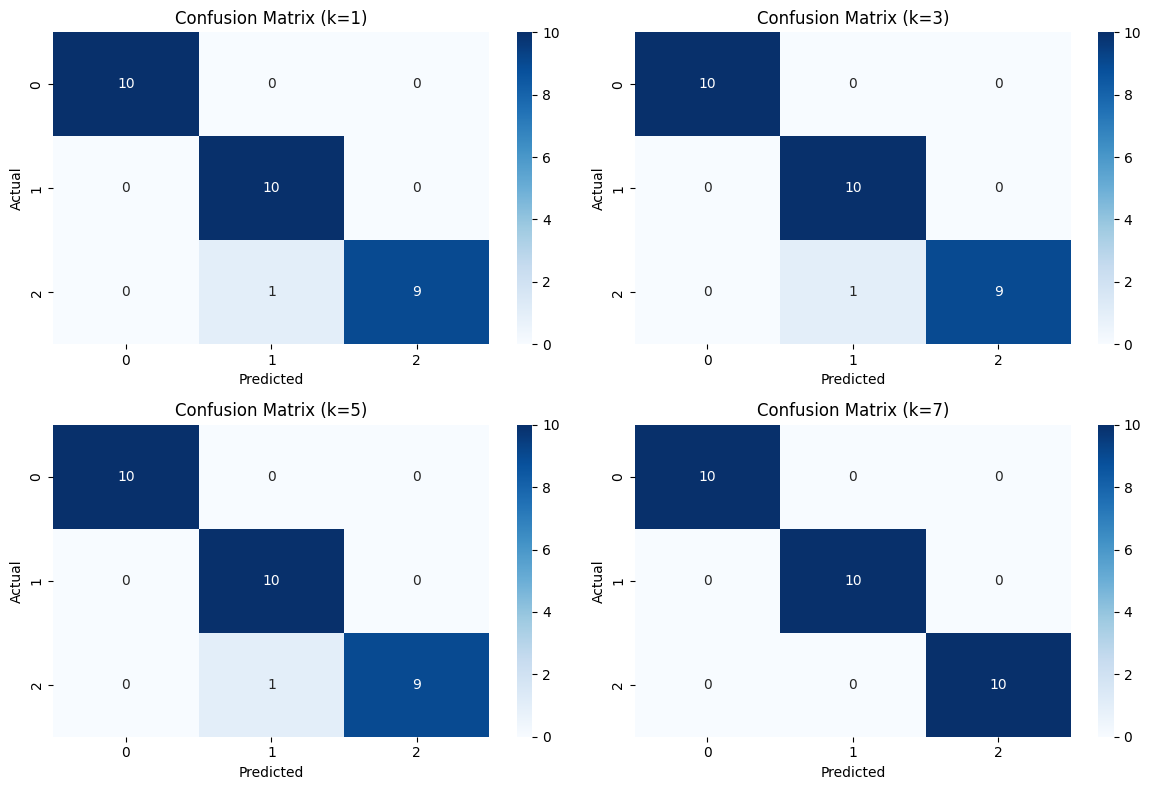

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the target variable for the test data using each model
y_pred_1 = knn_1.predict(X_test)
y_pred_3 = knn_3.predict(X_test)
y_pred_5 = knn_5.predict(X_test)
y_pred_7 = knn_7.predict(X_test)

# Calculate the accuracy score for each model
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_5 = accuracy_score(y_test, y_pred_5)
accuracy_7 = accuracy_score(y_test, y_pred_7)

print(f"Accuracy for k=1: {accuracy_1}")
print(f"Accuracy for k=3: {accuracy_3}")
print(f"Accuracy for k=5: {accuracy_5}")
print(f"Accuracy for k=7: {accuracy_7}")

# Generate and plot confusion matrices for each model
models = [knn_1, knn_3, knn_5, knn_7]
y_preds = [y_pred_1, y_pred_3, y_pred_5, y_pred_7]
k_values = [1, 3, 5, 7]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, (model, y_pred, k) in enumerate(zip(models, y_preds, k_values)):
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
  axes[i].set_title(f"Confusion Matrix (k={k})")
  axes[i].set_xlabel("Predicted")
  axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

## Model optimization

### Subtask:
Model Optimization: Find the best K value for the KNN classifier.


**Reasoning**:
Find the best K value using cross-validation and plot the results.



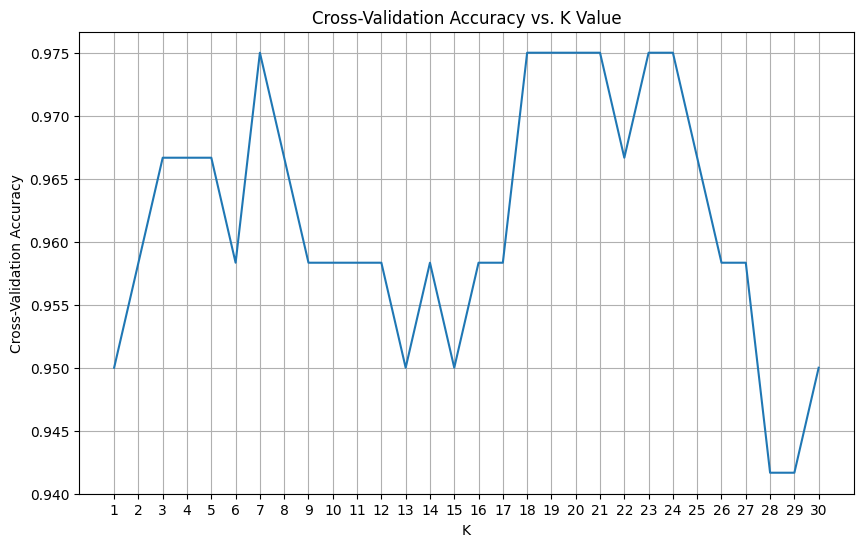

Best K value: 7


In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid for K values
param_grid = {'n_neighbors': range(1, 31)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV for optimal K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']

# Plot the cross-validation scores against K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), grid_search.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xticks(range(1,31))
plt.grid(True)
plt.show()

# Train a new KNN classifier using the best K value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

print(f"Best K value: {best_k}")

## Data visualization

### Subtask:
Visualize the decision boundaries of the best KNN model and the confusion matrix.


**Reasoning**:
Create a meshgrid for visualizing the decision boundaries and predict the class for each point in the meshgrid using the best KNN model. Then, plot the decision boundaries and the training data points. Finally, generate and plot the confusion matrix for the best KNN model on the test data.



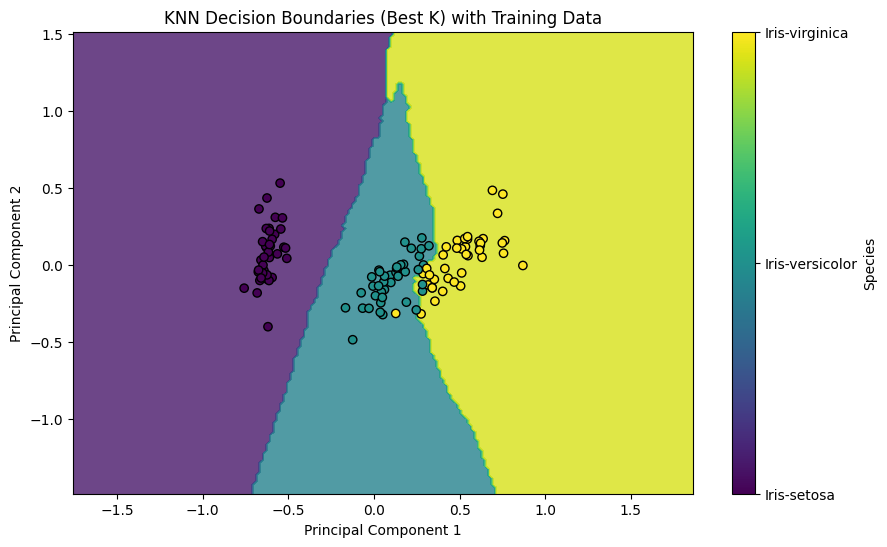

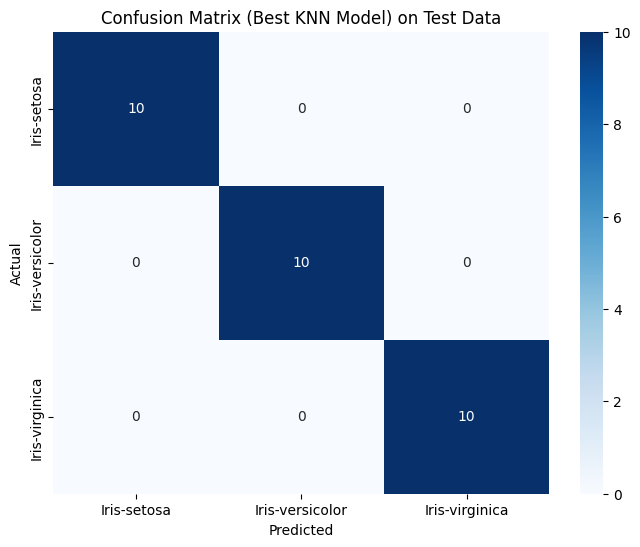

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Use the first two principal components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the best KNN model on the PCA-transformed training data
best_knn.fit(X_train_pca, y_train)

# Create a meshgrid of points to plot the decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Map species names to numerical values for contour plotting
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_train_numeric = y_train.map(species_map)
Z_numeric = np.array([species_map[label] for label in Z.ravel()]).reshape(Z.shape)


# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=plt.cm.viridis)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_numeric, edgecolors='k', cmap=plt.cm.viridis)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries (Best K) with Training Data')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species').set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

# Predict on the test data for the confusion matrix
y_pred_best_knn = best_knn.predict(X_test_pca)

# Generate and display the confusion matrix for the best KNN model
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap="Blues", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title("Confusion Matrix (Best KNN Model) on Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Summary:

### Q&A
No questions were posed in the provided data analysis task.

### Data Analysis Key Findings
* The Iris dataset was successfully loaded and explored, revealing no missing values and a balanced distribution across the three species.
* Features were normalized using MinMaxScaler, and the data was split into training (80%) and testing (20%) sets, with stratification to maintain class proportions.
* Four KNN models were trained with different *k* values (1, 3, 5, and 7).  The model with *k*=7 achieved perfect accuracy on the test set.
* GridSearchCV with 5-fold cross-validation identified *k*=7 as the optimal *k* value, maximizing accuracy.
* Decision boundaries were visualized using PCA-transformed data for the best model (*k*=7), providing a visual representation of the model's classification performance.  The confusion matrix further detailed the model's accuracy across classes.


### Insights or Next Steps
* The KNN classifier with *k*=7 performs exceptionally well on the Iris dataset.
* Explore other classification algorithms to compare their performance against the optimized KNN model.
